# Naive Bayesian classifier

In [10]:
import cv2
import numpy as np
import os
from skimage import io
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

/home/ilkka/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [240]:
FolderPath = '../../Untitled Folder/yalefaces_crop/'
DataPath = []

#read all the images form the FolderPath folder
for i in os.listdir(FolderPath):
    #add all files to the DataPath
    DataPath.append(os.path.join(base_path, i))
        
        
ImageData = []
ImageLabels = []
#print(DataPath)

for file in DataPath:
    #read image file 
    ImageIn = io.imread(file, as_grey=True)
    #add image file to an array
    ImageData.append(ImageIn)
    #parse image label
    LabelIn = int(os.path.split(file)[1].split("B")[1].split("_")[0]) #.replace("subject", "")) - 1 # Parse class label from file
    #add image label to an array
    ImageLabels.append(LabelIn)

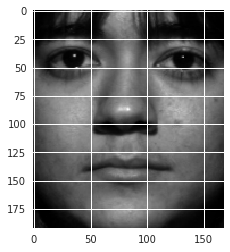

32


In [241]:
#print a sample image from the data.
i = np.random.randint(1,len(ImageData))
Img = ImageData[i]
plt.imshow(Img, cmap='gray')
plt.show()
print(ImageLabels[i])

In [250]:
#split data into training and testing sets.
x = np.array(ImageData)
y = np.array(ImageLabels)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.20, random_state = 10)

/home/ilkka/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [251]:
#Check that data is correct
NumberOfXSamples = len(ImageData)
NumberOfYSamples = len(ImageLabels)
if NumberOfXSamples == NumberOfYSamples:
    print('Number of samples :', NumberOfXSamples)
else:
    print('Somting fishy is going on, the Amount of X and Y do not match...')
    print('Number of X: ', NumberOfXSamples, 'and number of Y:', NumberOfYSamples)
#check the number of classes in the data
NumberOfClasses = len(np.unique(y))
print ('Number of unique classes ', NumberOfClasses)


Number of samples : 2432
Number of unique classes  38


In [252]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

print (x_train.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]* x_test.shape[2])

(486, 192, 168)


In [255]:
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)


nb_classes = len(np.unique(y_test))
print ('Number of unique classes ', nb_classes)

Training matrix shape (486, 32256)
Testing matrix shape (1946, 32256)
Number of unique classes  38


In [256]:
import seaborn as sns; sns.set()
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.pipeline import make_pipeline

In [257]:
model = MultinomialNB()
model.fit(x_train,y_train);

In [258]:
y_guess = model.predict(x_test)

In [259]:
right = 0
wrong = 0
for i in range(len(x_test)):
    if y_test[i] == y_guess[i]:
        right += 1
    else :
        wrong += 1 
    #print('oikea', y_test[i],'arvaus', y_guess[i])
print('oikein: ',right, ' väärin: ', wrong)

oikein:  516  väärin:  1430


In [260]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [267]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 250
h=192
w=168
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, x_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(x_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 250 eigenfaces from 486 faces
done in 1.674s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.603s


In [272]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 26.569s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [273]:
target_names = []
for i in range(np.size(np.unique(y_test))):
    target_names.append(str(np.unique(y_test)[i]))
n_classes = 39

Predicting people's names on the test set
done in 0.308s
             precision    recall  f1-score   support

          1       1.00      0.87      0.93        47
          2       0.96      0.86      0.91        57
          3       0.51      0.96      0.67        47
          4       0.72      0.82      0.77        50
          5       1.00      0.73      0.85        56
          6       0.98      0.86      0.91        50
          7       0.84      0.81      0.82        52
          8       1.00      0.87      0.93        53
          9       1.00      0.75      0.86        52
         10       0.91      0.78      0.84        51
         11       0.94      0.88      0.91        52
         12       0.89      0.84      0.86        49
         13       0.26      0.62      0.37        55
         15       0.98      0.84      0.90        50
         16       0.91      0.82      0.86        50
         17       1.00      0.69      0.81        51
         18       0.88      0.96      0.9

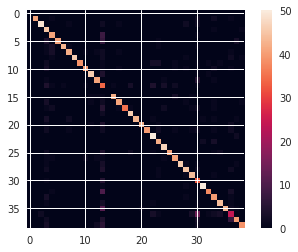

In [274]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
plt.imshow(confusion_matrix(y_test, y_pred, labels=range(n_classes)));
plt.colorbar()
plt.show()
np.savetxt('confusion_matrix.txt' , confusion_matrix(y_test, y_pred, labels=range(n_classes)))